# Construct decision tree using CART 
Library are used in this code

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [4]:
# Load the Iris dataset (can be replaced with any dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Initialize the Decision Tree Classifier (CART)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions using the test data
y_pred = clf.predict(X_test)

In [8]:

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


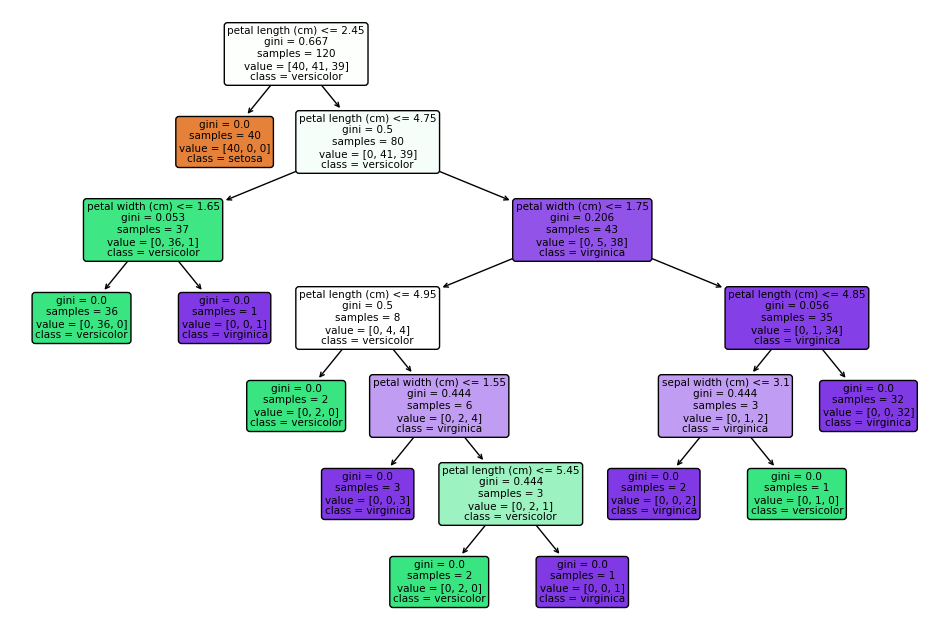

In [10]:

# Visualize the Decision Tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()


# Implement CART algorithm to construct decisison treees

In [4]:
import numpy as np


In [6]:
# Function to calculate Gini impurity
def gini_impurity(groups, classes):
    # Count all samples
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        # Calculate score of the group
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / float(size)
            score += p * p
        # Weight the group score by its size
        gini += (1.0 - score) * (size / n_instances)
    return gini


In [8]:

# Function to split dataset
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


In [12]:
# Function to choose the best split point for the dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_impurity(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}


In [14]:
# Create terminal node
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)


In [16]:
# Recursive function to split the nodes
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)


In [18]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [20]:
# Make a prediction
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


In [22]:
# CART Algorithm
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = [predict(tree, row) for row in test]
    return predictions


### Golf Play Dataset:

| Outlook   | Temperature | Humidity | Windy | Play Golf |
|-----------|-------------|----------|-------|-----------|
| Sunny     | Hot         | High     | False | No        |
| Sunny     | Hot         | High     | True  | No        |
| Overcast  | Hot         | High     | False | Yes       |
| Rainy     | Mild        | High     | False | Yes       |
| Rainy     | Cool        | Normal   | False | Yes       |
| Rainy     | Cool        | Normal   | True  | No        |
| Overcast  | Cool        | Normal   | True  | Yes       |
| Sunny     | Mild        | High     | False | No        |
| Sunny     | Cool        | Normal   | False | Yes       |
| Rainy     | Mild        | Normal   | False | Yes       |
| Sunny     | Mild        | Normal   | True  | Yes       |
| Overcast  | Mild        | High     | True  | Yes       |
| Overcast  | Hot         | Normal   | False | Yes       |
| Rainy     | Mild        | High     | True  | No        |

This dataset contains 14 instances with the following features:
1. **Outlook**: Categorical (Sunny, Overcast, Rainy)
2. **Temperature**: Categorical (Hot, Mild, Cool)
3. **Humidity**: Categorical (High, Normal)
4. **Windy**: Boolean (True, False)
5. **Play Golf**: The :
    print(f"Expected={test_data[i][-1]}, Predicted={prediction}")
```

### Explanation:
- **Categorical Data**: The categorical values are converted into numbers for easier handling by the CART algorithm:
  - `Outlook`: `Sunny=0`, `Overcast=1`, `Rainy=2`
  - `Temperature`: `Hot=0`, `Mild=1`, `Cool=2`
  - `Humidity`: `High=0`, `Normal=1`
  - `Windy`: `False=0`, `True=1`
  - `Play Golf`: `No=0`, `Yes=1`

### Output:
After running the decision tree on this dataset, the predictions will be compared with the actual labels (`Play Golf`), and the model’s performance will be shown.

This simple dataset can be used to observe how a decision tree splits data based on weather conditions to predict whether someone should play golf.

In [26]:

golf_data = [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [2, 1, 0, 0, 1],
    [2, 2, 1, 0, 1],
    [2, 2, 1, 1, 0],
    [1, 2, 1, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 2, 1, 0, 1],
    [2, 1, 1, 0, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1],
    [2, 1, 0, 1, 0]
]

# Split into train/test (for simplicity, using the same dataset)
train_data = golf_data
test_data = golf_data

# Set the maximum depth and minimum size
max_depth = 3
min_size = 1

# Implementing the decision tree using the previously defined decision_tree function
predictions = decision_tree(train_data, test_data, max_depth, min_size)

# Print the predictions for the test data
for i, prediction in enumerate(predictions):
    print(f"Expected={test_data[i][-1]}, Predicted={prediction}")


Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
